# Trabajo final __Aprendizaje No Supervisado__

__Carlos Esteban Posada__  
__crls.esteban@hotmail.com__

## Descripción
El objetivo de este trabajo es encontrar y estudiar una versión mejorada de alguno de los algoritmos vistos en clase sobre clustering.  


<br>

__Procedimiento:__
* Seleccione alguno de los métodos de clustering vistos en clase
* Buscar en la literatura un artículo que proponga una mejora al método seleccionado
* Comparar los resultados de ambos algoritmos en almenos 2 datasets calculando:
    * métricas intrínsecas
    * métricas extrínsecas (a uno de ellos)
* Análisis exhaustivo de los resultados donde se evidencie:
    * ¿Se puede evidenciar la mejora propuesta por el artículo, en los resultados?

## Método seleccionado
El método que seleccionaré para implementar una mejora es el __K-MEANS__

### Descripción del método general

k-Means es un algoritmo de aprendizaje no supervisado cuyo objetivo es encontrar una agrupación adecuada de la data en k distintos grupos. 

El único parámetro indispensable del algoritmo es __k__ que representa el número de grupos. 

El algoritmo es iterativo y hace lo siguiente:
1. Inicializa los centroides: Este paso es el punto de partida y tiene diversas variantes como por ejemplo: aleatorio, puntos dentro de la data (medioides), inicialización k-means ++, etc. Y en este trabajo realizaremos 2 métodos más de inicialización de centros. 
Cabe destacar que uno también le puede pasar los centros al algoritmo

2. Calcula la __distancia__ de cada punto del dataset a cada uno de los __k__ centroides. Este paso es importante porque _¿qué es distancia?_ 
La métrica de distancia también la podemos seleccionar, siendo la euclídea la más común. 

3. Asigno cada punto a su centroide más cercano. En este paso, cada punto del conjunto de datos quedará marcado con su centroide más cercano, esto ya de por sí es una agrupación. 

4. Recalcular los centroides: Dado que cada centroide tiene "a su cargo" unos puntos, la idea es dados esos puntos, encontrar cuál es el centroide que mejor los representa. 
Si en este paso no hay ningún cambio en los centroides (o el cambio es menor que una tolerancia dada) el algoritmo para y la agrupación quedará dada por los elementos que estén más cerca a cada centroide.  
De otro modo, se va al paso 2. 


Se puede iterar hasta un número de iteraciones máximas dada como parámetro al algoritmo o esperar que se cumpla el criterio de parada descrito en el paso 4. 

A continuación un gif animado que ilustra cómo se ejecuta un k-means

![ChessUrl](https://dashee87.github.io/images/kmeans.gif "chess")


## Literatura encontrada

Para la solución de este trabajo se pide encontrar un artículo con una mejora. 
En mi caso particular encontré __dos__ artículos que proponen una inicialización diferente de los centroides. 

En el presente trabajo desarrollaré ambas aproximaciones.


### Artículo 1: 
__título__: An Improvement in K-means Clustering Algorithm  
__Autores__: Anand Sutariya1, Prof. Kiran Amin  
__URL__: https://www.ijert.org/research/an-improvement-in-k-means-clustering-algorithm-IJERTV2IS1385.pdf



#### __Metodología__: 
En este artículo proponen un método para elegir los centros iniciales.  
La idea presentada es un método que hará que el K-means converja más rápido al haber encontrado unos centroides iniciales que ya representan muy bien los datos. 



#### __pseudo-código__


__input:__  
D = {d1, d2, ... dn} // conjunto con los n puntos que tiene la data   
k // el número de clusters


__pasos:__  
1. haga m = 1. # será una variable que se usará para iterar entre los distintos k clusters

2. Calcular la distancia entre cada punto de la data y todos los demás puntos en el conjunto D

3. Encontrar el par de datos más cercanos del conjunto D y agrégelos al conjunto A_m (1<=m<=k). Borre los dos datos anteriores del conjunto D.

4. Encuentre el punto de D que está más cercano al conjunto A_m, agréguelo a Am y bórrelo de D.

5. Repita el paso 4 hasta que el número de puntos en el conjunto A_m alcance 0.75*(n/k)

6. Si m<k, encontes haga m= m+1, encuentre otro par de puntos dentro de D cuyas distancias entre ellos sean las menores y cree otro conjunto A_m con estos dos puntos. Bórrelos del conjunto D. (igual que el paso 3).

7. Para cada punto conjunto de datos A_m (1<=m<=k) encuentre la media aritmética de los puntos que componen el conjunto. Estas medias serán los centroides iniciales

### Artículo 2: 
__título__: An Approach for Selecting Optimal Initial Centroids
to Enhance the Performance of K-means  
__Autores__: Mostafizer Rahman, Sohrab Mahmud, Nasim Akhtar  
__URL__: https://www.researchgate.net/publication/331429949_An_Approach_for_Selecting_Optimal_Initial_Centroids_to_Enhance_the_Performance_of_K-means



#### __Metodología__: 
En este artículo proponen un método para elegir los centros iniciales.  
La idea central es darle pesos a cada punto y al final escoger los centroides de acuerdo a los pesos relativos de cada punto dentro del dataset. 



#### __pseudo-código__


__input:__    
k // el número de clusters


__pasos:__  
1. Calcular el peso ponderado de cada datapoint (Ws)

2. Ordenar los datos de acuerdo al peso ponderado (Ws)

3. Dividir la data ordenada en k subconjuntos (k es el número de clusters)

4. Calcular la media de cada uno de los k subconjuntos

5. Finalmente se tomarán estas medias como los nuevos centroides


## Bibliotecas a utilizar

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler



import itertools as it
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.metrics import cluster

## Data
En este trabajo se pide utilizar al menos 2 datasets. 
Dado que (como se verá más adelante) los resultados no son concluyentes con 2 datasets, cargaré 4:
* Boston dataset
* Diabetes dataset
* Iris
* four_density

Estos dataset fueron escogidos por su facilidad de carga, diversidad de datos y porque vienen de dos problemas distintos: 2 son de clasificación y 2 son de regresión.

### Carga de los datos

In [ ]:
dict_boston = datasets.load_boston() # data de un problema de regresión
dict_dbts = datasets.load_diabetes() # data de un problema de regresión
dict_iris = datasets.load_iris() # data de un problema de clasificación

In [ ]:
# data sintética generada por el profesor felix
data_file_url = 'https://raw.githubusercontent.com/flifuehu/viu-unsupervised-learning/master/datasets/sinteticos/dataset_cuatro_diferente_densidad.csv'
data_sintetica_4_densidad = np.array(pd.read_csv(data_file_url,header=0))
dict_four_density = {
    "data": data_sintetica_4_densidad[:, :2],
    "target": data_sintetica_4_densidad[:, 2]
} # data de un problema de clasificación

In [ ]:
# agregar el número de grupos y si el tipo de dataset
dict_boston["tipo_dataset"] = "regression"
dict_boston["k_num_grupos"] = 5

dict_dbts["tipo_dataset"] = "regression"
dict_dbts["k_num_grupos"] = 5

dict_four_density["tipo_dataset"] = "classification"
dict_four_density["k_num_grupos"] = 4

dict_iris["tipo_dataset"] = "classification"
dict_iris["k_num_grupos"] = 2


### Estructura de toda la data

Cada dataset es un diccionario que contiene las características, la variable objetivo (para los sets de clasificación), el tipo de dataset y el número de grupos que se usarán en el clustering. 

El número de grupos para los datasets Iris y four_density, se asignaron de acuerdo a las categorías reales que estos datasets presentan. 

El número de grupos para los otros datasets se configuró en 5 de manera arbitraria

In [ ]:
# diccionario con todos los datasets que se necesitan
dict_datos = {
    "boston": dict_boston,
    "diabetes": dict_dbts,
    "four_density": dict_four_density,
    "iris": dict_iris
}

In [ ]:
# Estandarizar los datos
# Para cada diccionario de datos se agregará otra llave conteniendo la data estandarizada
for name, diccionario in dict_datos.items():
    print(f"estandarizando: {name}")
    # print(diccionario)
    # print(diccionario['data'])
    est = StandardScaler()
    data_preprocesada = est.fit_transform(diccionario['data'])
    # guardo la data preprocesada en el diccionario original
    diccionario["data_prep"] = data_preprocesada

estandarizando: boston
estandarizando: diabetes
estandarizando: four_density
estandarizando: iris


## Funciones Auxiliares

En esta sección implementaremos una serie de funciones auxiliares que se usarán en varias partes del notebook

### Funciones de distancias y de manipulación de matrices

In [ ]:
# Auxiliares

# Definimos la distancia euclidiana de una instancia x 
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):   
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_mahalanobis(x, y, mC):
    v = x-y
    v.shape=(v.size,1)
    mCi = np.linalg.inv(mC)
    res = np.sqrt(np.sum(v.transpose() * mCi* v))
    return res

def distancia_euclidiana(x, y):   
    return np.sqrt(np.sum((x-y)**2))

# def matriz_distancias(X, distancia=distancia_euclidiana):
#     mD = np.zeros((X.shape[0],X.shape[0]))
#     for pair in it.product(np.arange(X.shape[0]), repeat=2):
#         mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
#     return mD

def matriz_distancias(X, distancia=distancia_euclidiana, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :], mC)
        else:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :])
    return mD

def eliminar_indices_matriz(mat, indices):
    # esta función toma una matriz y elimina las filas y columnas en los índices 
    # del argumento "indices"
    # y retorna la nueva matriz con esos índices borrados
    indices_ordenados = sorted(list(indices), reverse=True) # ordenamos los índices de último a primero para proceder a borrar filas y columnas
    
    for indice in indices_ordenados:
        mat = np.delete(mat, indice, 0)
        mat = np.delete(mat, indice, 1)

    return mat

### Métricas

In [ ]:
# métricas
def medida_error(mat):
    maxs = np.zeros(mat.shape[0])
    for l in np.arange(mat.shape[0]):
        maxs[l] = np.max(mat[l, :])
    maxs = np.sum(maxs)
    return 1 - maxs / np.sum(mat)

# https://stats.stackexchange.com/questions/95731/how-to-calculate-purity
def medida_pureza(mat):
    # `totales` calcula cuantos elementos se han predicho para cada uno 
    # de los 4 clusters que le hemos pedido al k-means
    totales = np.sum(mat, axis=0) / np.sum(mat)
    # comenzamos el cálculo de la pureza
    precision_klmax = np.zeros(mat.shape[1])
    # para cada cluster predicho
    for k in np.arange(mat.shape[1]):
        # multiplicamos la fracción de elementos predichos para ese cluster entre
        # el total de elementos en nuestro dataset (definida como `totales`) por
        # el número máximo de instancias que comparte el `k-ésimo` cluster predicho 
        # con alguno de los reales entre el total de elementos predichos para el 
        # `k-ésimo` cluster de instancias predichas
        precision_klmax[k] = totales[k] * np.max(mat[:,k] / np.sum(mat[:,k]))
    # la fórmula de la pureza nos pide la suma de todos los clusters
    return np.sum(precision_klmax)

def medida_precision(mat, l, k):
    # cuántos elementos del cluster predicho `k` coinciden con el cluster real `l`
    return mat[l,k]/np.sum(mat[:,k])

def medida_recall(mat, l, k):
    # cuántos elementos del cluster real `l` coinciden con el cluster predicho `k`
    return mat[l,k]/np.sum(mat[l,:])

def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        return 2*prec*rec/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat, 1) / np.sum(mat)
    f1 = np.zeros(mat.shape)
    for l in np.arange(mat.shape[0]):
        for k in np.arange(mat.shape[1]):
            f1[l, k] = medida_f1_especifica(mat, l, k)
    f1 = np.sum(totales * np.max(f1, axis=1))
    return f1

In [ ]:
# implementamos una función que calcule la matriz de confusión
def matriz_confusion(cat_real, cat_pred):
  cats = np.unique(cat_real)
  clusts = np.unique(cat_pred)

  mat_conf = np.zeros((cats.size, clusts.size), dtype=int)
  for i in np.arange(cats.size):
    for j in np.arange(clusts.size):
      # predictedIJ almacena para cada grupo real cats[i], que coincidencias tiene con el grupo predicho clusts[j]
      predictedIJ = (cat_real == cats[i]) & (cat_pred == clusts[j])
      mat_conf[i, j] = np.sum(predictedIJ)
  return mat_conf

## Implementaciones de mejoras - Papers

En esta sección se implementarán los métodos de inicialización de centros descritos en los papers

In [ ]:
## código para generar centroides iniciales aleatorios. Todos los métodos tendrán esta estructura de input-ouput
def centros_iniciales_aleatorios(k, data):
    # esta función me retorna 3 elementos aleatorios de la lista data. 
    # cada elemento será a su vez un vector de la dimensionalidad de data
    print("generando centros iniciales aleatorios")
    random_indexes = np.random.choice(range(len(data)), k, replace=False)
    return data[random_indexes, :]

### Implementación centroides paper 1
sutariya_amin

In [ ]:
def centros_iniciales_sutariya_amin(k, data):
    # Este método implementa la inicialización de los centros según el paper 
    # en https://www.ijert.org/research/an-improvement-in-k-means-clustering-algorithm-IJERTV2IS1385.pdf

    n = len(data)
    D = data.copy() # Un set que contiene una copia de los datos originales.
    
    # Se calcula la matriz de distancias original
    print("calculando matriz de distancias. Este paso puede tardar algunos minutos por ser de orden O(n^2)")
    mat_dist = matriz_distancias(D)
    mat_dist_copia = mat_dist.copy() # una copia que se guardará para evitar calcularla de nuevo más adelante

    # transformo la diagonal en infinito para evitar que salga como el punto más cercano
    mat_dist[mat_dist==0] = np.inf


    A = {} # diccionario que contendrá los puntos de cada cluster. serán k llaves valores dentro de A
    for m in range(k):
        print("escogiendo centro número:", m)

        # step 3: encontrar la pareja de puntos más cercana dentro de D
        indexes2delete = set(np.argwhere(mat_dist== np.min(mat_dist))[0])
        # print(indexes2delete)

        # step 4: encontrar el únto más cercano al conjunto de puntos que están en A
        limite_elementos = 0.75* n // k
        while len(indexes2delete) <= limite_elementos:
            valor_minimo = np.inf
            index_minimo = 0
            for fila in indexes2delete:
                min_fila = np.min(mat_dist[fila])
                if min_fila < valor_minimo:
                    valor_minimo = min_fila
                    index_minimo = np.argmin(mat_dist[fila])

            # se agrega el nuevo índice mínimo al vector de indexes2delete
            # y se hace infinita esa columna
            indexes2delete.add(index_minimo)
            mat_dist[:, index_minimo] = np.inf
            # print(mat_dist)
            # print(indexes2delete)
        
        # Guardo los elementos que pertenecerán al cluster m
        A[m] = D[list(indexes2delete)]

        # elimino de D los elementos en los indexes2delete (en orden de mayor a menor)
        D = D[list(set(range(len(D)))-indexes2delete)] # tomo los índices que no estén en indexes2delete
        # print(f"calculando matriz de distancias para D de tamaño {D.shape}")
        mat_dist = eliminar_indices_matriz(mat_dist, indexes2delete)
        mat_dist[mat_dist==0] = np.inf

    # step 7: se calculan los centroides
    centroides = []
    for key, grupo in A.items():
        centroides.append(np.mean(grupo, axis=0))
    centroides = np.array(centroides)
    return centroides  

### Implementación centroides paper 2: 
rahman_mahmud_akhtar

In [ ]:
# generar método de paper 2
def centros_iniciales_rahman_mahmud_akhtar(k, data):
    # Este método implementa la inicialización de los centros según el paper 
    # en https://www.researchgate.net/publication/331429949_An_Approach_for_Selecting_Optimal_Initial_Centroids_to_Enhance_the_Performance_of_K-means

    
    maximos = np.max(data, axis=0)
    Ws = np.dot(data, 1/maximos)

    # se crea un dataframe para colocar la columna de pesos y luego ordenarla
    data_df = pd.DataFrame(data)
    data_df["W"] = Ws
    data_df = data_df.sort_values(by="W") # se organiza la data por el peso (de menor a mayor)


    # se parte el dataset ordenado en k distintos datasets. 
    # luego se saca la media de cada uno
    centroids = []
    for item in np.array_split(data_df.drop("W", axis=1), k):
        # print(item.shape)
        # print(item.head())
        # print(item.values.mean(axis=0))
        centroids.append(item.values.mean(axis=0))
        # print()

    centroids = np.array(centroids) # se transforma el objeto en un nd array
    return centroids

## K-Means genérico

En esta sección se implementará el método de K-means que recibe el criterio de centros a utilizar y de acuerdo a esto invoca el método deseado. 

In [ ]:
def k_means_optimizado(data, K, criterio_init_centros="random"):
    # Preparamos el vector donde guardamos la asignación de cada elemento 
    # a un clúster (1,...,K)
    Dyp = np.zeros(data.shape[0])

    # obtenemos los centros iniciales
    print(f"inicializando centroides por el método de {criterio_init_centros}")

    if criterio_init_centros == "random":
        cDx = centros_iniciales_aleatorios(K, data) #centros_iniciales_sutariya_amin(k, data)
    if criterio_init_centros == "sutiraya_amin":
        cDx = centros_iniciales_sutariya_amin(K, data)
    if criterio_init_centros == "rahman_mahmud_akhtar":
        cDx = centros_iniciales_rahman_mahmud_akhtar(K, data)

    num_iteraciones = 0
    iterando = True 
    while iterando:
        # Vector auxiliar para guardar los centros de la iteración pasada
        # necesarios para identificar la convergencia
        cDx_ant = cDx.copy()

        # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
        for i in np.arange(data.shape[0]):
            # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
            # a cada centro existente en cDx. Podemos utilizar para ello la función
            # distancia_euclidiana_grupo.
            distancia_punto_a_centros = distancia_euclidiana_grupo(data[i], cDx)## Tu código aquí ##
            # Una vez calculada la distancia, necesitamos averiguar el índice de
            # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
            pred_y = np.argmin(distancia_punto_a_centros)
            Dyp[i] = pred_y

        # Calcular los nuevos centros
        for k in range(K):
            # Necesitamos recalcular la media de las coordenadas de los elementos 
            # asignados a cada cluster. Recordad que cDx es la matriz donde almacenamos
            # los centroides, así que tendrá la forma (k, 2).

            # Para calcular la media de los elementos de un cluster, primero necesitamos
            # saber qué elementos pertenecen a ese cluster, lo cual podemos obtener usando
            # `Dyp` y `k`. Esto nos devolverá un vector de booleanos que podremos usar con
            # `Dx` para obtener las coordenadas de los elementos del cluster `k`. Una vez
            # disponemos de dichas coordenadas, simplemente tenemos que calcular la media.
            # Tened en cuenta que `np.mean` reduce la media a 1 único valor, y nosotros 
            # necesitamos 2 valores, uno para la coordenada x y otro para la y.
            # Podéis usar el argumento `axis` para indicarle a np.mean sobre qué dimensión
            # de la matriz de puntos `Dx` queréis realizar la media.

            index_belonging = Dyp==k # mask of indexes of elements belonging to cluster k
            belonging_elems = data[index_belonging] # elements that belong to cluster k
            cDx[k,:] = np.mean(belonging_elems, axis=0) ## Tu código aquí ##

        # for k in np.arange(k):
        #     ax.plot( [cDx_ant[k,0], cDx[k,0]],[cDx_ant[k,1], cDx[k,1]], linestyle='-', marker='*', c='y')
        
        iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
        num_iteraciones+=1

    return cDx, Dyp, num_iteraciones

## Experimentos

En esta sección ejecutaremos una serie de experimentos. 

Se ejecutará un análisis cluster con los 2 métodos de los papers y se comparará con una serie de simulaciones de k-means con centroides aleatorios. 

Para comparar variables como número de iteraciones o métricas, basta con correr una vez cada método de los papers. __Pero__ será necesario ejecutar varias veces el k-means aleatorio pues con una sola ejecución no se puede concluir qué método es mejor

In [ ]:
# Objeto necesario para guardar las métricas
metricas_df = pd.DataFrame(columns=[
                                    "dataset_name",
                                    "model_name" ,
                                    "num_iterations",
                                    "num_grupos",
                                    "tipo_dataset",
                                    "error_cometido",
                                    "pureza_agrupamiento",
                                    "f1_score",
                                    "completeness_score",
                                    "homogeneity",
                                    "mutual_info",
                                    "silueta",
                                    "calinski_harabasz",
                                    "davies_buildin"
                                    ])

metricas_df

,dataset_name,model_name,num_iterations,num_grupos,tipo_dataset,error_cometido,pureza_agrupamiento,f1_score,completeness_score,homogeneity,mutual_info,silueta,calinski_harabasz,davies_buildin


In [ ]:
criterios_kmans = ["sutiraya_amin", "random", "rahman_mahmud_akhtar"]
dataset_names = ["four_density", "diabetes","boston", "iris"]

In [ ]:
num_simulaciones = { # si es random hacer varias, si es saturiya_amin o rahman_mahmud_akhtar hacer una sola
    "random": 30,
    "sutiraya_amin":1,
    "rahman_mahmud_akhtar": 1
}

for dataset_name in dataset_names:
    # print(dataset)
    data_dict = dict_datos[dataset_name] 
    dataset = data_dict["data_prep"]

    # lo siguiente se usa para las métricas intrínsecas
    print(f"calculando mahalanobis para {dataset_name} (puede tardar unos minutos)")
    mC = np.cov(dataset.transpose())
    Ma_mahalanobis = matriz_distancias(dataset, distancia_mahalanobis, mC)
    for criterio in criterios_kmans:
        for simul in range(num_simulaciones[criterio]):
            k_actual = data_dict["k_num_grupos"]
            tipo_dataset = data_dict["tipo_dataset"]
            print(dataset_name,"-", criterio, "  simul: ", simul)

            # Ejecutación del k-means con los parámetros dados
            cDx, Dyp, num_iteraciones = k_means_optimizado(dataset, k_actual, criterio)
            print()

            # métricas intrínsecas
            silueta = cluster.silhouette_score(Ma_mahalanobis, Dyp)#medida_silueta(dataset, Dyp)
            calinski_harabasz = cluster.calinski_harabasz_score(Ma_mahalanobis, Dyp)
            davies_buildin = cluster.davies_bouldin_score(Ma_mahalanobis, Dyp)

            # métricas extrínsecas
            mat_conf = None
            mE = None
            mP = None
            mF1 = None
            completeness_score = None
            homogeneity = None
            mutual_info = None
            if tipo_dataset == "classification":
                mat_conf = matriz_confusion(data_dict["target"], Dyp)
                mE = medida_error(mat_conf)
                mP = medida_pureza(mat_conf)
                mF1 = medida_f1(mat_conf)
                completeness_score = cluster.completeness_score(data_dict["target"], Dyp)
                homogeneity = cluster.homogeneity_score(data_dict["target"], Dyp)
                mutual_info = cluster.adjusted_mutual_info_score(data_dict["target"], Dyp)

            # guardado de los resultados en el dataframe
            registro_dict = {
                "model_name": criterio, 
                "dataset_name": dataset_name,
                "num_iterations": num_iteraciones,
                "num_grupos": k_actual,
                "tipo_dataset": tipo_dataset,
                "error_cometido": mE,
                "pureza_agrupamiento": mP,
                "f1_score": mF1,
                "completeness_score":completeness_score,
                "homogeneity":homogeneity,
                "mutual_info":mutual_info,
                "silueta": silueta,
                "calinski_harabasz":calinski_harabasz,
                "davies_buildin":davies_buildin
            }
            metricas_df = metricas_df.append(registro_dict, ignore_index=True)


calculando mahalanobis para four_density (puede tardar unos minutos)
four_density - sutiraya_amin   simul:  0
inicializando centroides por el método de sutiraya_amin
calculando matriz de distancias. Este paso puede tardar algunos minutos por ser de orden O(n^2)
escogiendo centro número: 0
escogiendo centro número: 1
escogiendo centro número: 2
escogiendo centro número: 3

four_density - random   simul:  0
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  1
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  2
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  3
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  4
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_densi

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


four_density - random   simul:  6
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  7
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  8
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  9
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  10
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  11
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  12
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density - random   simul:  13
inicializando centroides por el método de random
generando centros iniciales aleatorios

four_density

In [ ]:
metricas_df.head()

,dataset_name,model_name,num_iterations,num_grupos,tipo_dataset,error_cometido,pureza_agrupamiento,f1_score,completeness_score,homogeneity,mutual_info,silueta,calinski_harabasz,davies_buildin
0,four_density,sutiraya_amin,13,4,classification,0.00450225,0.995498,0.995465,0.976114,0.966793,0.971355,0.79635,6145.179510,0.522650
1,four_density,random,7,4,classification,0.0970485,0.950975,0.904893,0.79545,0.805141,0.799747,0.68143,2759.854641,1.557853
2,four_density,random,13,4,classification,0.00450225,0.995498,0.995465,0.976114,0.966793,0.971355,0.79635,6145.179510,0.522650
3,four_density,random,13,4,classification,0.00450225,0.995498,0.995465,0.976114,0.966793,0.971355,0.79635,6145.179510,0.522650
4,four_density,random,14,4,classification,0.00450225,0.995498,0.995465,0.976114,0.966793,0.971355,0.79635,6145.179510,0.522650


In [ ]:
# metricas_df.to_csv("metricas_df.csv", index="False")

## Resultados

En esta sección compararemos los resultados de los 3 métodos de inicialización (paper 1, paper 2 y random). 

Cabe señalar que el método random se ejecuto 30 veces porque no se puede concluir nada de una sola inicialización.  

Por lo tanto las comparaciones se harán entre los métodos de los papers 1 y 2, versus la __media__ de los 30 resultados del método random

### Número de iteraciones

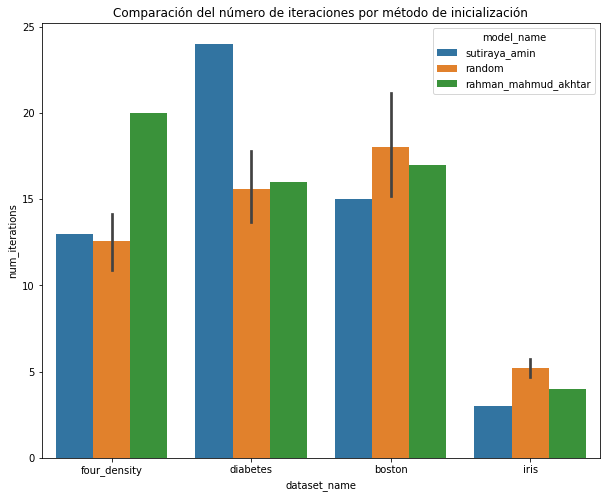

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(y= "num_iterations", hue="model_name", x= "dataset_name", data= metricas_df)
plt.title("Comparación del número de iteraciones por método de inicialización")
plt.show()

Se puede observar cómo el método de mejora 1 tiene menor número de iteraciones para converger que los demás métodos en los datasets:
* iris
* bostón

La segunda inicialización supera la inicialización random en los mismos datasets. 

Para los datasets de four_density y diabetes, el método de inicialización no pudo ser superado (en media) por las inicializaciones de los dos papers

### Métricas extrínsecas

En esta sección revisaremos las métricas extrínsecas de los 2 datasets que cuentan con categorías reales, pues vienen de problemas de clasificación:
* iris
* four_density

In [ ]:
data_extrinsecas = metricas_df[metricas_df["dataset_name"].isin(["four_density", "iris"])]
data_extrinsecas.head()

,dataset_name,model_name,num_iterations,num_grupos,tipo_dataset,error_cometido,pureza_agrupamiento,f1_score,completeness_score,homogeneity,mutual_info,silueta,calinski_harabasz,davies_buildin
0,four_density,sutiraya_amin,13,4,classification,0.00450225,0.995498,0.995465,0.976114,0.966793,0.971355,0.79635,6145.179510,0.522650
1,four_density,random,7,4,classification,0.0970485,0.950975,0.904893,0.79545,0.805141,0.799747,0.68143,2759.854641,1.557853
2,four_density,random,13,4,classification,0.00450225,0.995498,0.995465,0.976114,0.966793,0.971355,0.79635,6145.179510,0.522650
3,four_density,random,13,4,classification,0.00450225,0.995498,0.995465,0.976114,0.966793,0.971355,0.79635,6145.179510,0.522650
4,four_density,random,14,4,classification,0.00450225,0.995498,0.995465,0.976114,0.966793,0.971355,0.79635,6145.179510,0.522650


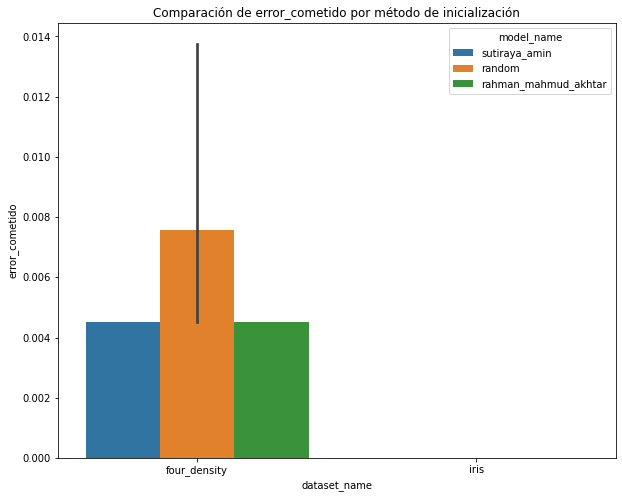

In [ ]:
variable= "error_cometido"
plt.figure(figsize=(10, 8))
sns.barplot(y= variable, hue="model_name", x= "dataset_name", data= data_extrinsecas)
plt.title(f"Comparación de {variable} por método de inicialización")
plt.show()

Se puede observar cómo para el dataset four_density, las dos inicializaciones de los papers convergen a clustering de error menor que la media de los errores cometidos por el método random.


Cabe resaltar también cómo para el dataset iris el error cometido por los 3 métodos converge a 0. Indicando que este dataset es bien caracterizable por las formas esféricas de un k-means.

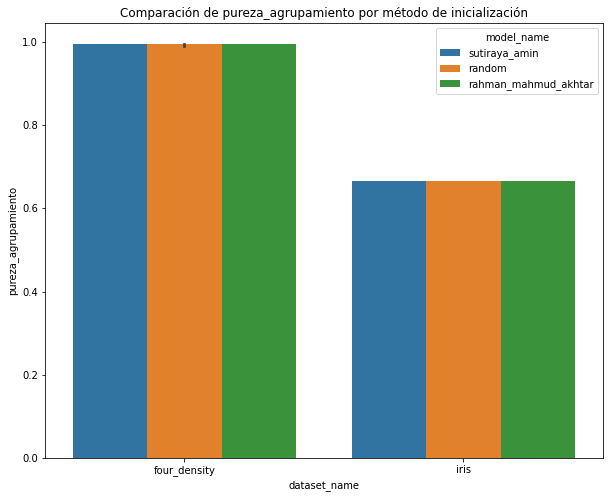

In [ ]:
variable= "pureza_agrupamiento"
plt.figure(figsize=(10, 8))
sns.barplot(y= variable, hue="model_name", x= "dataset_name", data= data_extrinsecas)
plt.title(f"Comparación de {variable} por método de inicialización")
plt.show()

Se puede observar cómo la medida de pureza del agrupamiento es muy similar independientemente del método de inicialización. 

Cabe resaltar que para el dataset de four_density se puede alcanzar una pureza más alta que para el dataset iris

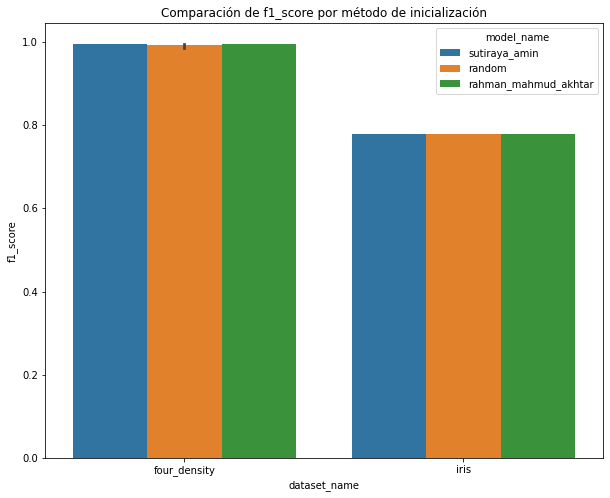

In [ ]:
variable= "f1_score"
plt.figure(figsize=(10, 8))
sns.barplot(y= variable, hue="model_name", x= "dataset_name", data= data_extrinsecas)
plt.title(f"Comparación de {variable} por método de inicialización")
plt.show()

El F1_score muestra un comportamiento idéntico al de la métrica de pureza (excepto por la escala). 

Acá tampoco se observa una diferencia clara que se derive del método de inicialización para ningún dataset.

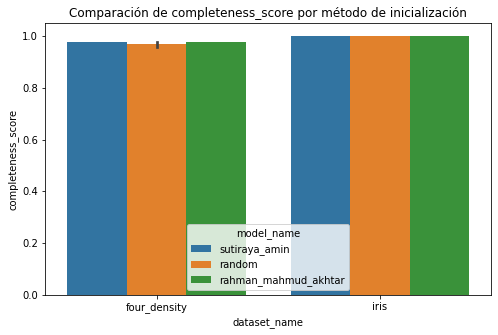

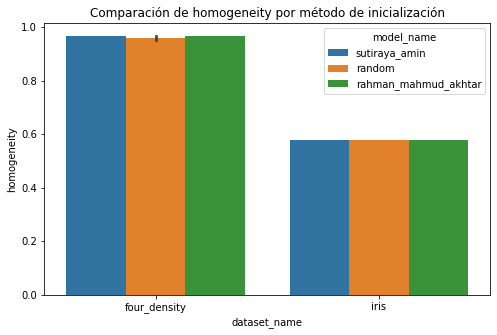

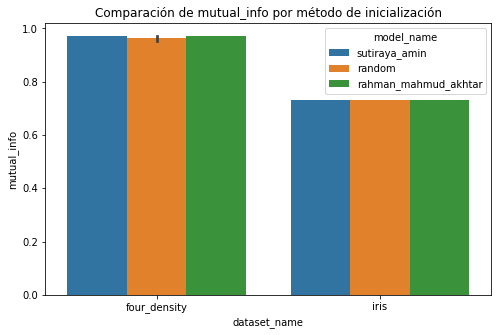

In [ ]:
variable= "completeness_score"
plt.figure(figsize=(8, 5))
sns.barplot(y= variable, hue="model_name", x= "dataset_name", data= data_extrinsecas)
plt.title(f"Comparación de {variable} por método de inicialización")
plt.show()

variable= "homogeneity"
plt.figure(figsize=(8, 5))
sns.barplot(y= variable, hue="model_name", x= "dataset_name", data= data_extrinsecas)
plt.title(f"Comparación de {variable} por método de inicialización")
plt.show()

variable= "mutual_info"
plt.figure(figsize=(8, 5))
sns.barplot(y= variable, hue="model_name", x= "dataset_name", data= data_extrinsecas)
plt.title(f"Comparación de {variable} por método de inicialización")
plt.show()

Se puede observar cómo el comportamiento de F1_score y Pureza del agrupamiento, se replica para las métricas de completitud, homogeneidad e información mutua.

### Métricas intrínsecas
Dado que estas métricas dependen sólo del agrupamiento como tal y no de la existencia de una variable objetivo categórica en el dataset, estas métricas se midieron para todos los conjuntos de datos

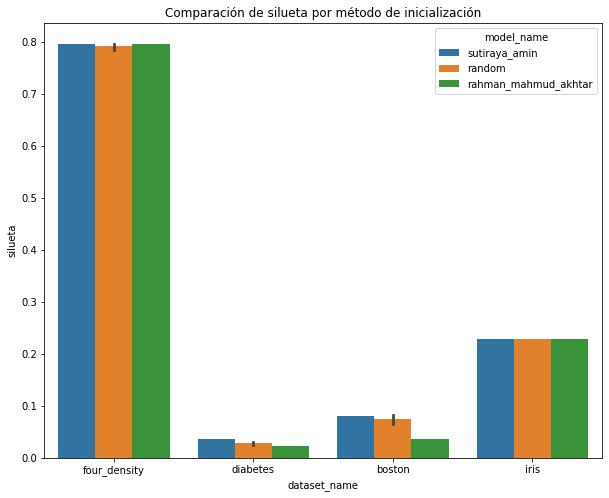

In [ ]:
variable= "silueta"
plt.figure(figsize=(10, 8))
sns.barplot(y= variable, hue="model_name", x= "dataset_name", data= metricas_df)
plt.title(f"Comparación de {variable} por método de inicialización")
plt.show()

Cabe resaltar cómo el método de inicialización 1, muestra ser igual o superior en "silueta" que el método random para todos los datasets. 

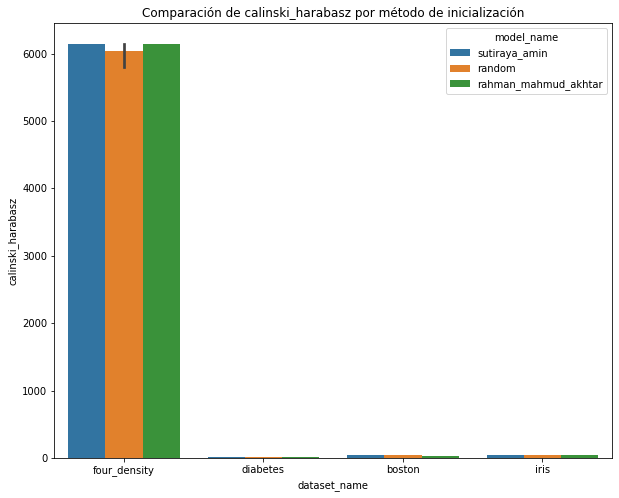

In [ ]:
variable= "calinski_harabasz"
plt.figure(figsize=(10, 8))
sns.barplot(y= variable, hue="model_name", x= "dataset_name", data= metricas_df)
plt.title(f"Comparación de {variable} por método de inicialización")
plt.show()

A pesar de la escala, la métrica de calinski harabasz muestra dar siempre superior o igual en el método del paper 1 que en el método random. 
Es un comportamiento idéntico (excepto por escala) del de la métrica de Silueta

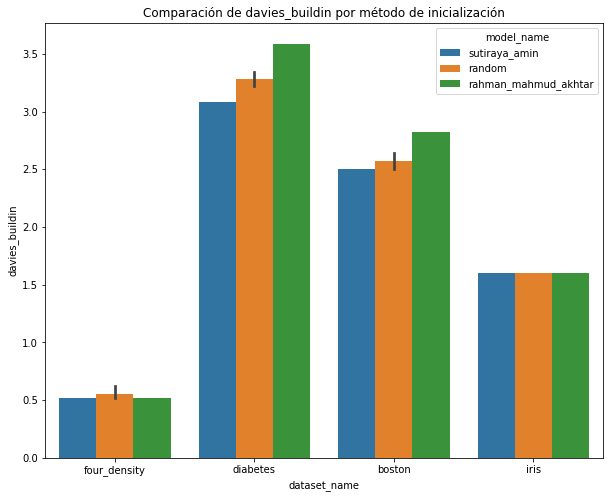

In [ ]:
variable= "davies_buildin"
plt.figure(figsize=(10, 8))
sns.barplot(y= variable, hue="model_name", x= "dataset_name", data= metricas_df)
plt.title(f"Comparación de {variable} por método de inicialización")
plt.show()

El método random siempre está rodeado de los resultados de los otros dos métodos. En este caso la métrica siempre es menor o igual para el método del paper 1 comparado con el resultado del método de inicialización random

## Conclusiones

En este trabajo se compararon 3 distintos métodos de inicialización de los centroides del k-means, aplicados a 4 datasets disintos. 

Entre las conclusiones más relevantes quiero señalar:

* Ningún método dominó completamente a otro en todos los datasets cuando de velocidad de convergencia hablamos. Se refuerza una idea empírica que evidenciamos en clase y es: cuando se trata de aprendizaje no supervisado, nada está escrito. Es cuestión de probar y probar hasta encontrar cuál es el mejor método para el dataset dado.

* Las métricas extrínsecas dieron muy similares para todos los métodos, esto debido a que si bien la inicialización de los centros fue distinta, los cluster finales convergian a ser muy parecidos. 

* Se puede observar cómo en la mayoría de los casos, el método del paper 1 (Anand Sutariya1, Prof. Kiran Amin) resultó en mejores métricas extrínsecas que el método 2 y que la inicialización aleatoria.

* Si bien se observó un muy buen desempeño en velocidad de convergencia, métricas extrínsecas y métricas intrínsecas del método de inicialización del paper 1, no creo que sea un método práctico de usar, pues requiere un cálculo de distancias de todos vs todos, lo cual es de orden O(n^2). Esto implica que para datasets grandes, este método sería inviable por la gran cantidad de operaciones que tendrá que hacer. 